# 다항회귀

## 다항식 특성으로 변환

In [1]:
# sampel [[0,1][2, 3]] 변환 연습
import numpy as np 

X = np.arange(4).reshape(2,2)
# -1 : 행은 중요하지 않고 다른값 원하는대로 재배열하고 그 다믐에 나를 채우렴 
# 2열로 만들어줘 남는걸로 채우니까 2열2행

In [2]:
# 특성의 수를 늘려준다. 
# 특성의 수 2개 특성 1이 0, 2 / 특성 2가 1, 3
# 샘플은 가로기준 
# 특성의 수를 늘리니까 컬럼을 늘리는 것 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [3]:
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [4]:
poly.fit_transform(X)

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [5]:
# 어떤 항(특성)이 곱해지는지 (만들어지는지)알고싶을 때 
poly.get_feature_names() 

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

x0은 2, x1은 3 제로제곱은 4 둘곱은 6 1제곱은 9

## 사이킷런으로 다항 회귀 분석

### 1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

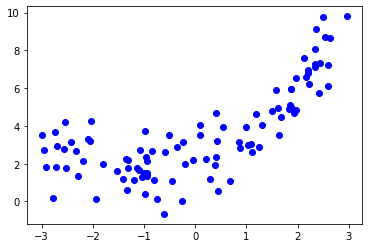

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

plt.scatter(X, y, color = 'blue')
plt.show() 

### 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

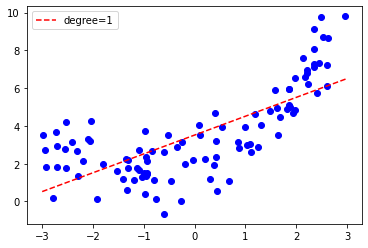

In [10]:
from sklearn.linear_model import LinearRegression 

X1_train = X
y_train = y

reg1 = LinearRegression().fit(X1_train, y_train)

xx = np.arange(-3, 3, 0.01)[:, np.newaxis] # newaxis : 새로운 축. 차원을 하나 더 축을 하나 더 쌓아서 원래 있던 배열을 변경시켜달라는 의미 
# 2차원으로 만들기 위해 Np.newaxis : 차원을 올리는 것 
yy = reg1.predict(xx)

plt.plot(xx, yy, color='r', linestyle='--', label='degree=1')
plt.scatter(X, y, color = 'b')
plt.legend() 
plt.show()

### 3) 2차항 형태로 다항 회귀 수행

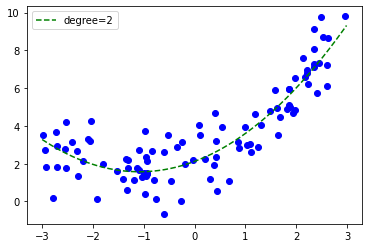

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 2)

X2_train = poly.fit_transform(X) # 변환기를 거쳐서 하나의 샘플마다 값이 세개 
y_train = y


# 선형회귀에 추정기 넣기 
# 변환된 특성이 들어있는 x2_train이 들어감 
# 객체생성하고 학습하는 과정까지  (추정기를 만들어서) 
reg2 = LinearRegression().fit(X2_train, y_train)
# 회귀모델이 생겼다. = 계수와 절편이 생겼다 

# 각각의 엑스에 대해서 추정기 reg2에 xx 값을 넣으면 됨 
# reg2에 예측값 넣을 때에는 xx를 변환시켜서 넣어야한다. = 변환기에다 넣어야한다느 ㄴ의미 = poly에 넣음 
# 학습은 안시키고 transform 만 시킨다. 이 변환기를 자기의 변환기가 아닌 만들었던 변환기에 넣는 것 
# 자기를 기준으로 삼는 것이 아닌 만들었떤 변환기에 넣기만 하는 것 
# 때문에 fit 쓰지 않고 transform 넣음 
# 후에 2차식으로 만들어야하기 때문에 Np.newaxis 
# => y값 나온다. 

xx = np.arange(-3, 3, 0.01)
yy = reg2.predict(poly.transform(xx[:, np.newaxis])) # = y는 예측값 

plt.plot(xx, yy, color = 'g', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b')
plt.legend()
plt.show()

### 구해진 2차식의 계수 확인

In [14]:
reg2.coef_, reg2.intercept_

(array([[0.        , 1.01273441, 0.46626575]]), array([2.12259952]))

##### reg2의 coef는 상수, x, x제곱 순서  
#### y = 0.58x + 1.027x + 1.87
##### reg2의 intercept는 상수항
#### 데이터를 만들 때 y = 0.5x2(제곱)  + x+2 + 0.-
#### 엇비슷하게 맞췄다. 

---
### 4) 7차항 형태로 다항회귀 수행
#### 특성을 늘리기 위해 polynomialFeatures라는 변환기 가져왔다. 
#### 7차로 늘리면 원래 값이 하나였던 엑스가 각 샘플마다 특성이 7개로 늘어났다. 

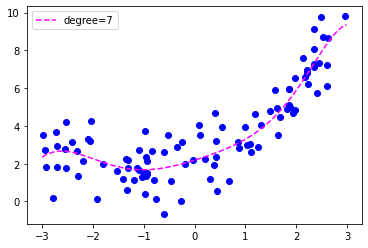

In [16]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 7)

X7_train = poly.fit_transform(X) # 변환기를 거쳐서 하나의 샘플마다 값이 일곱개  
y_train = y


reg7 = LinearRegression().fit(X7_train, y_train)


xx = np.arange(-3, 3, 0.01)
yy = reg7.predict(poly.transform(xx[:, np.newaxis])) #xx가 1차원이니까 입력데이터 형태인 2차로 맞춰야함. 
# yy는 7차 모델의 예측값

plt.plot(xx, yy, color = 'magenta', linestyle='--', label='degree=7')
plt.scatter(X, y, color='b')
plt.legend()
plt.show()

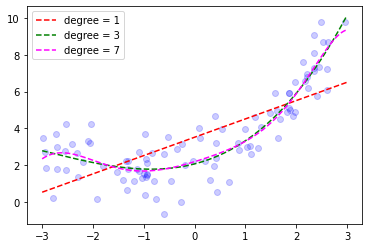

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

degree = [1, 3, 7]
colors = ['red','green','magenta']

plt.scatter(X, y, color = 'b', alpha = 0.2 ) # 원본데이터 그려주기 alpha는 투명도
for i, d in enumerate(degree): # 리스트 각 항목과 인덱스를 한 튜플로 짝꿍으로 내놓게 된다.  for문을 돌 때마다 (0, 1) (1,2),(2,3)으로 나옴 각각 i, d에 해당됨
    poly = PolynomialFeatures(degree = d)
    X_train = poly.fit_transform(X)
    y_train = y
    
    reg = LinearRegression().fit(X_train, y_train)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(poly.transform(xx[:, np.newaxis]))
    
    
    plt.plot(xx, yy, color = colors[i], linestyle = '--', \
            label = 'degree = {}'.format(d)) # 선형회귀 그래프 그려줌 
    plt.legend()
plt.show()

데이터가 여러번 변환기와 추정기를 거쳐야 할 때 파이프라인을 써서 한번에 거칠 수 있도록 하는 것 
파이프라인 굉장히 많이 쓰게 될 것 

#### 파이프라인 모듈을 써서 변환하는 과정을 단순화 시킬 수 있다. 
##### 변환하는 사전처리와 모델링하는 과정을 합쳐서 단일객체

# Pipeline 

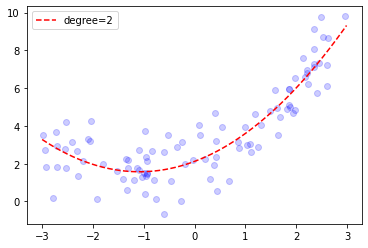

In [18]:
# 1) degree = 2인 모델 
# 간단하게 만들 수 있는 파이프라인을 써보자 
from sklearn.pipeline import make_pipeline 

# 파이프라인 객체를 만든다. 모델이름 reg / 
reg = make_pipeline(PolynomialFeatures(degree=2), \
                   LinearRegression()).fit(X, y)
# reg.fit을 따로 써도 되지만 그냥 한번에 붙임

xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
yy = reg.predict(xx) # 파이프라인 객체에서 변환하고 모델링하는 것 까지 전부 함 

plt.plot(xx, yy, color = 'r', linestyle = '--', label='degree=2')

plt.scatter(X, y, color = 'b', alpha = 0.2)
plt.legend()
plt.show()

# pipeline을 활용한 다항회귀

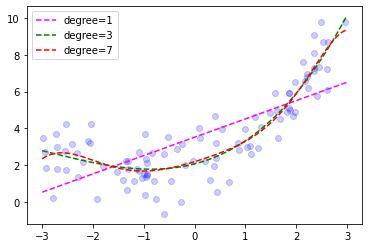

In [19]:
# 2) degree = [1, 3, 7]인 모델을 파이프라인으로 변환 - 추정 통합 

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

degree = [1, 3, 7]
colors = ['magenta','green','red']

plt.scatter(X, y, color = 'b', alpha = 0.2)
for i, d in enumerate(degree): 
    reg = make_pipeline(PolynomialFeatures(degree = d), \
                       LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
    yy = reg.predict(xx)
    
    plt.plot(xx, yy, color = colors[i], linestyle='--', \
            label = 'degree={}'.format(d))
    plt.legend()
plt.show()

---

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 필요한 라이브러리 import 
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



## 데이터 수집

In [21]:
boston = load_boston()

## 데이터 이해

In [22]:
#boston.DESCR
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## 데이터 준비

### 독립변수, 종속변수를 데이터프레임으로 정리

In [24]:
df =pd.DataFrame(boston.data, columns=boston.feature_names)

X = pd.DataFrame(df['RM'])
y = boston.target

In [31]:
# 데이터프레임 확인
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [32]:
# 학습용, 검증용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y)

## 모델 구축

In [33]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
# 방의 갯수 최대값, 최소값
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mse: %.4f'%mse)
print('rmes: %.4f'%rmse)
print('r2: %.4f'%r2)

mse: 55.9855
rmes: 7.4823
r2: 0.3964


In [42]:
lr.coef_, lr.intercept_

(array([9.89986579]), -39.75019841940268)

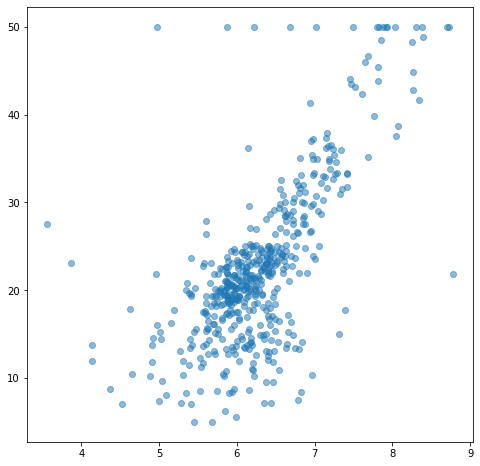

In [72]:
#원본 데이터 단순 회귀
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=0.5)


In [85]:
# 아래 셀에 있는 '???'를 지우고 본인이 작성한 코드를 입력하면 됩니다. 
X2_train


array([[ 1.      ,  4.88    , 23.8144  ],
       [ 1.      ,  6.484   , 42.042256],
       [ 1.      ,  5.693   , 32.410249],
       ...,
       [ 1.      ,  5.594   , 31.292836],
       [ 1.      ,  6.762   , 45.724644],
       [ 1.      ,  6.739   , 45.414121]])

In [89]:
y_train

array([10.2, 16.7, 16.2, 15.2, 50. , 14.1, 24.4, 20.4, 18.2, 36. , 22. ,
       19.3, 29. , 27.9, 21.4, 12.7, 19.9, 24.3, 19.8, 22. , 21.2, 13.6,
       29.1, 14.5, 13.4, 20.6, 14.6, 22.9, 22.5, 50. , 19.6,  9.6, 13.1,
       21.2, 31.5, 16.6, 42.3, 22.9, 23.3, 43.8,  8.7, 20.6, 19.4, 12.3,
       29.8, 20. , 18.5, 15. , 14.6, 24.5,  6.3, 34.9, 23.9, 50. , 14. ,
       32. , 22.6, 17.8, 23.1, 25.1, 23.8, 29. , 24.4, 27.1, 23.4, 19.4,
       28.5,  7.5, 17.3, 45.4, 20.8, 19.3, 24.5,  7.4, 23.5, 25. , 22.6,
       23. , 22.2, 13.8, 19.1, 20.3, 50. , 22.2, 23.2, 13.3, 21.6, 22.6,
       19.5, 23.3, 14.3, 23. , 21.7, 21.5, 30.1, 21.4, 13.6, 19.6,  8.3,
       14.5, 27. , 19.9, 23.7, 13.9,  8.5, 30.1, 50. , 28.7, 33.8, 25.3,
       28.6, 18.9, 13.4, 19.5, 17. , 18.7, 15.1, 20.1, 15.6, 42.8, 20.8,
       16.3,  8.8, 22.8, 19.2,  8.5, 19.4, 26.4, 24. , 26.7, 50. , 34.7,
       18.3, 21.4, 39.8, 24.7, 21.2, 24.3, 21.2, 22.4, 14.1,  9.7, 20.3,
       21.2, 11.7,  9.5, 10.2, 24.1, 43.1, 50. , 14

In [90]:
# 2차식의 다항회귀
poly = PolynomialFeatures(degree = 2)
X2_train = poly.fit_transform(X_train)
X2_test = poly.fit_transform(X_test)

reg2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = reg2.predict(X2_test)

print(reg2.coef_, reg2.intercept_)

xx2 = np.arange(-3, 3, 0.01)
yy2 = reg2.predict(poly.transform(xx2[:, np.newaxis]))


[  0.         -29.32082281   3.06044604] 84.55302508909996


In [ ]:

poly = PolynomialFeatures(degree = 2)

X2_train = poly.fit_transform(X) # 변환기를 거쳐서 하나의 샘플마다 값이 세개 
y_train = y


# 선형회귀에 추정기 넣기 
# 변환된 특성이 들어있는 x2_train이 들어감 
# 객체생성하고 학습하는 과정까지  (추정기를 만들어서) 
reg2 = LinearRegression().fit(X2_train, y_train)
# 회귀모델이 생겼다. = 계수와 절편이 생겼다 

# 각각의 엑스에 대해서 추정기 reg2에 xx 값을 넣으면 됨 
# reg2에 예측값 넣을 때에는 xx를 변환시켜서 넣어야한다. = 변환기에다 넣어야한다느 ㄴ의미 = poly에 넣음 
# 학습은 안시키고 transform 만 시킨다. 이 변환기를 자기의 변환기가 아닌 만들었던 변환기에 넣는 것 
# 자기를 기준으로 삼는 것이 아닌 만들었떤 변환기에 넣기만 하는 것 
# 때문에 fit 쓰지 않고 transform 넣음 
# 후에 2차식으로 만들어야하기 때문에 Np.newaxis 
# => y값 나온다. 

xx = np.arange(-3, 3, 0.01)
yy = reg2.predict(poly.transform(xx[:, np.newaxis])) # = y는 예측값 

plt.plot(xx, yy, color = 'g', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b')
plt.legend()
plt.show()

In [99]:
# 3차식의 다항회귀
poly = PolynomialFeatures(degree = 3)
X3_train = poly.fit_transform(X_train)
X3_test = poly.fit_transform(X_test)

reg3 = LinearRegression().fit(X3_train, y_train)
y_pred3 = reg3.predict(X3_test)

xx3 = np.arange(-3, 3, 0.01)

print(reg3.coef_, reg3.intercept_)



[  0.         -59.71257772   7.99651347  -0.2626166 ] 145.82037274870822
